##Classification of mechanical parts
#####Dataset: https://www.kaggle.com/manikantanrnair/images-of-mechanical-parts-boltnut-washerpin

In [2]:
#Changing working directory

In [3]:
cd '/content/drive/MyDrive/Deep_Learning1'

/content/drive/MyDrive/Deep_Learning1


In [4]:
#Listing out files in directoty
!ls

models	Parts  parts_predict.h5  Parts.zip  PlantVillage  Yoga	Yoga.zip


In [5]:
#Unzipping dataset zip file
#!unzip Parts.zip

In [6]:
!ls

models	Parts  parts_predict.h5  Parts.zip  PlantVillage  Yoga	Yoga.zip


In [7]:
#importing required libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

In [8]:
#Defining variables
data_path='/content/drive/MyDrive/Deep_Learning1/Parts'
train_path='/content/drive/MyDrive/Deep_Learning1/Parts/training'
test_path='/content/drive/MyDrive/Deep_Learning1/Parts/testing'
BATCH_SIZE=32
IMAGE_SIZE=224
CHANNEL=3

In [9]:
#Reading images
df_train=tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                    shuffle=True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE)
df_test=tf.keras.preprocessing.image_dataset_from_directory(test_path,
                                                    shuffle=True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE)

Found 6092 files belonging to 4 classes.
Found 1524 files belonging to 4 classes.


In [10]:
#Class names
CLASS_NAMES=df_train.class_names
print(CLASS_NAMES)

['bolt', 'locatingpin', 'nut', 'washer']


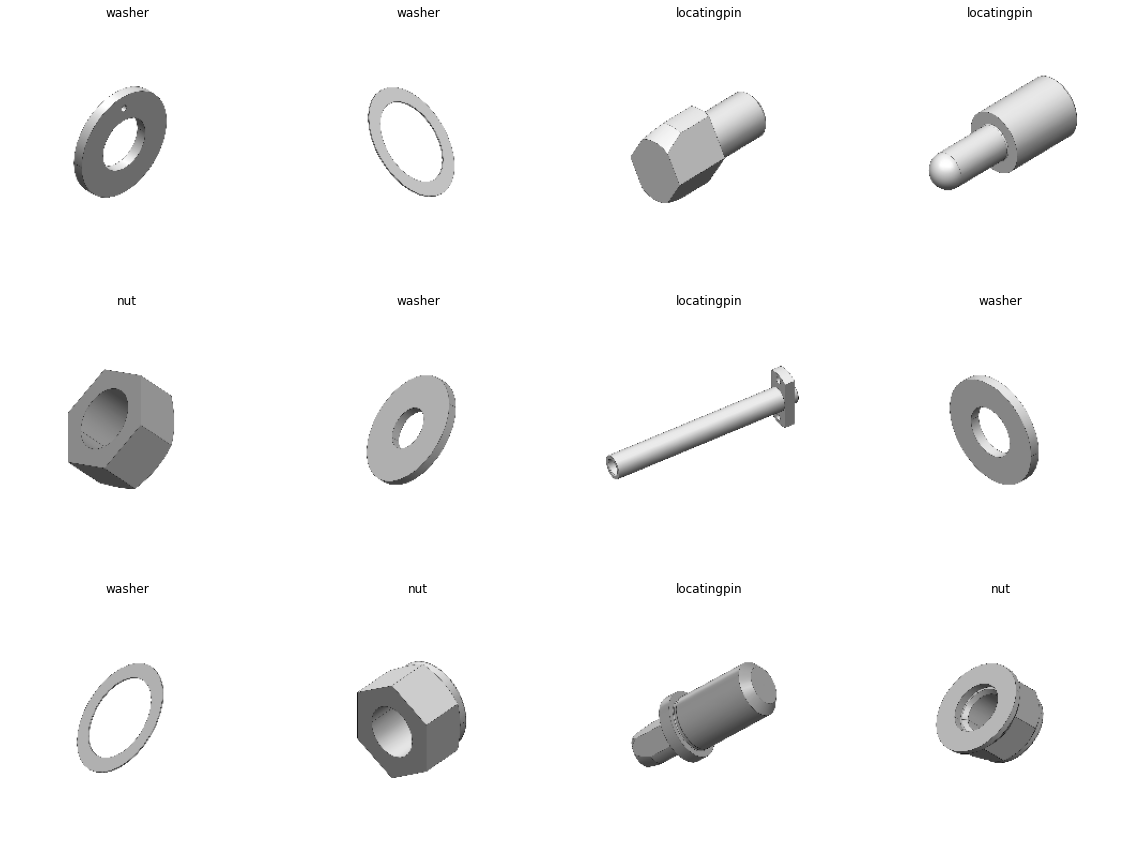

In [11]:
#Sample images with label as title.
plt.figure(figsize=(20,15))
for image,label in df_train.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(CLASS_NAMES[label[i]])
    plt.axis('off')

In [12]:
#Partitioning function: Split training data into test and validation for internal validation while training model.
def partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  ds_size=len(ds)
  train_size=int(ds_size*train_split)
  val_size=int(ds_size*val_split)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds,val_ds,test_ds

In [13]:
#splitting training data
train_ds,val_ds,test_ds=partition(df_train)

In [14]:
#Data size
print('train_ds size:',len(train_ds))
print('test_ds size:',len(test_ds))
print('val_ds size:',len(val_ds))

train_ds size: 152
test_ds size: 20
val_ds size: 19


In [15]:
#Shuffling data
train_ds=train_ds.cache().shuffle(1000).prefetch(1)
val_ds=val_ds.cache().shuffle(1000).prefetch(1)
test_ds=test_ds.cache().shuffle(1000).prefetch(1)

In [16]:
#Resizing and rescaling
resize_rescale=Sequential([
                           layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                           layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [17]:
#Data agumentation
data_agumentation=Sequential([
                              layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
                              layers.experimental.preprocessing.RandomRotation(0.2),
])

In [18]:
#MOdel building
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
model=Sequential([
                  resize_rescale,
                  data_agumentation,
                  layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
                  layers.MaxPool2D((2,2)),
                  layers.Conv2D(32,(3,3),activation='relu'),
                  layers.MaxPool2D((2,2)),
                  layers.Conv2D(32,(3,3),activation='relu'),
                  layers.MaxPool2D((2,2)),
                  layers.Conv2D(32,(3,3),activation='relu'),
                  layers.MaxPool2D((2,2)),
                  layers.Conv2D(32,(3,3),activation='relu'),
                  layers.MaxPool2D((2,2)),
                  layers.Flatten(),
                  layers.Dense(32,activation='relu'),
                  layers.Dense(len(CLASS_NAMES),activation='softmax')
])
model.build(input_shape=input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 111, 111, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 54, 54, 32)         0         
 2D)                                                  

In [19]:
#MOdel compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']
              )

In [20]:
#fitting model
EPOCHS=100
history=model.fit(train_ds,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          verbose=1,
          validation_data=val_ds)

Epoch 1/100
152/152 [==============================] - 500s 228ms/step - loss: 1.0760 - accuracy: 0.4876 - val_loss: 0.6482 - val_accuracy: 0.7188
Epoch 2/100
152/152 [==============================] - 19s 122ms/step - loss: 0.6630 - accuracy: 0.7209 - val_loss: 0.5712 - val_accuracy: 0.7812
Epoch 3/100
152/152 [==============================] - 19s 122ms/step - loss: 0.5920 - accuracy: 0.7669 - val_loss: 0.4970 - val_accuracy: 0.8076
Epoch 4/100
152/152 [==============================] - 18s 122ms/step - loss: 0.5242 - accuracy: 0.7952 - val_loss: 0.4586 - val_accuracy: 0.8158
Epoch 5/100
152/152 [==============================] - 19s 122ms/step - loss: 0.4817 - accuracy: 0.8123 - val_loss: 0.4685 - val_accuracy: 0.8405
Epoch 6/100
152/152 [==============================] - 18s 122ms/step - loss: 0.4463 - accuracy: 0.8249 - val_loss: 0.3660 - val_accuracy: 0.8569
Epoch 7/100
152/152 [==============================] - 18s 122ms/step - loss: 0.4272 - accuracy: 0.8425 - val_loss: 0.4053 

In [21]:
#Evaluation of test_ds
model.evaluate(test_ds)

20/20 [==============================] - 14s 53ms/step - loss: 0.1131 - accuracy: 0.9578


[0.11312569677829742, 0.957812488079071]

In [22]:
#Evaluation of test data set
model.evaluate(df_test)

48/48 [==============================] - 148s 3s/step - loss: 0.0930 - accuracy: 0.9692


[0.09302809089422226, 0.9691600799560547]

In [23]:
#history detail in trained model.
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
#Extracting loss and accuracy
loss=history.history['loss']
accuracy=history.history['accuracy']
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']

Text(0.5, 1.0, 'accuracies')

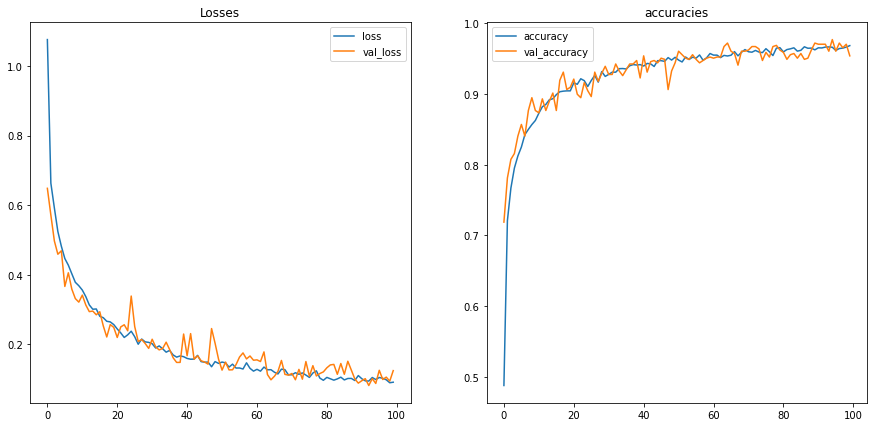

In [25]:
#Plotting trainig and validation dataset loss and accuracy plots
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.title('Losses')

plt.subplot(1,2,2)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.legend(['accuracy','val_accuracy'])
plt.title('accuracies')


Actual_Class: washer
Predicted_Class: washer


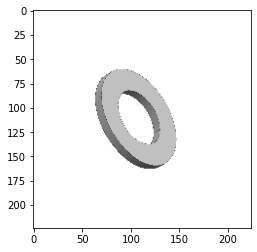

In [33]:
#Predicting for one of the image in test data
for image,label in df_test.take(1):
  plt.imshow(image[0].numpy().astype('uint8'))
  print('Actual_Class:',CLASS_NAMES[label[0]])
  pred=model.predict(image)
  print('Predicted_Class:',CLASS_NAMES[np.argmax(pred[0])])

In [27]:
#Prediction function
def predictions(model,img):
  image_array=tf.keras.preprocessing.image.img_to_array(image[i].numpy())
  image_array=tf.expand_dims(image_array,0)
  pred=model.predict(image_array)
  pred_class=CLASS_NAMES[np.argmax(pred[0])]
  confi=round(max(pred[0])*100,2)
  return pred_class,confi


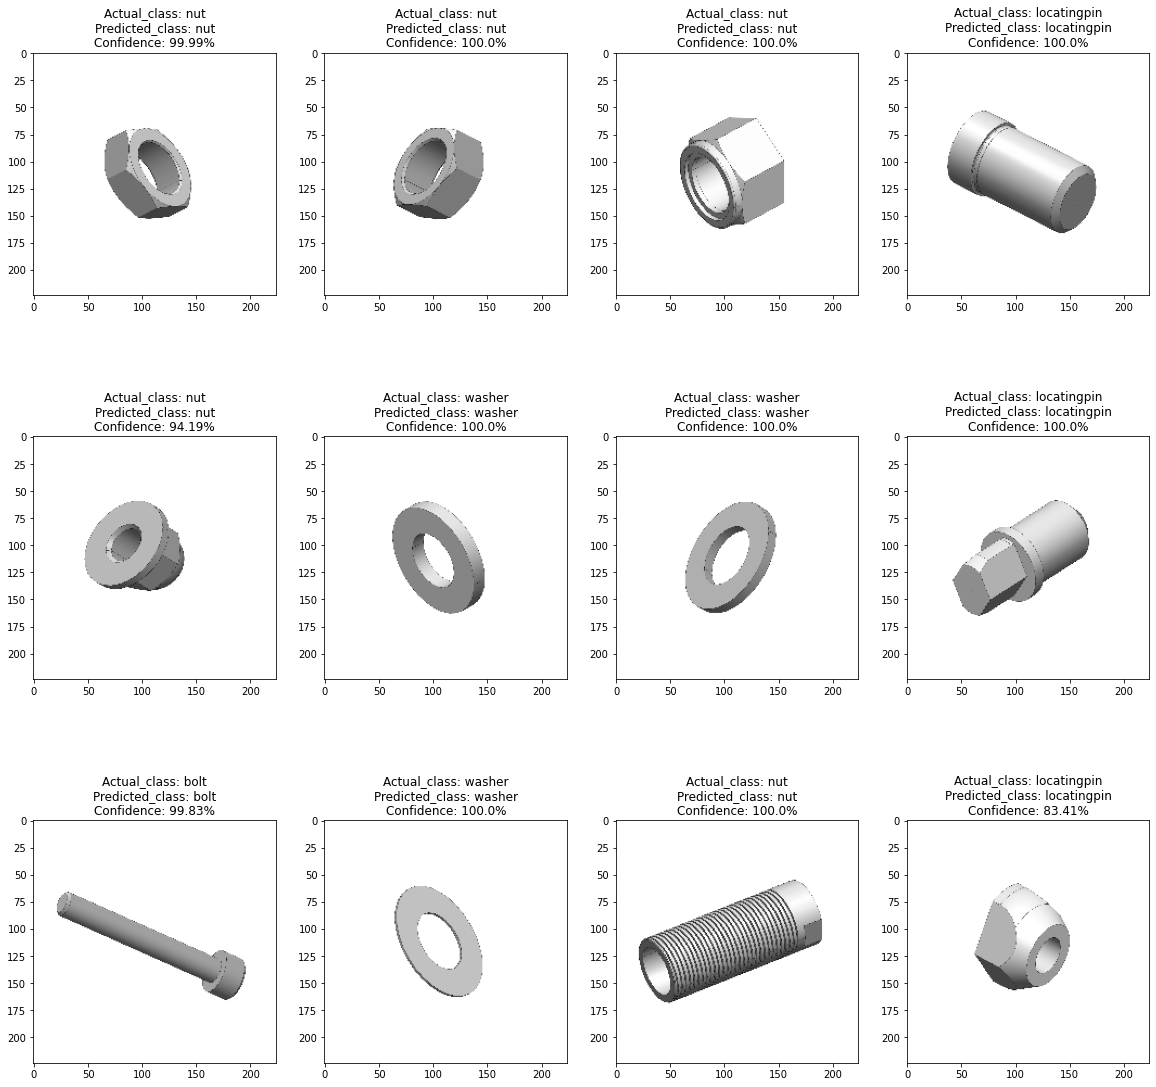

In [28]:
#Predicting sample images from test dataset with confidence %.
plt.figure(figsize=(20,20))
for image,label in df_test.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    pred_class,confi=predictions(model,image[i].numpy())
    plt.title(f'Actual_class: {CLASS_NAMES[label[i]]}\nPredicted_class: {pred_class}\nConfidence: {confi}%')

In [29]:
model.save(data_path+'/'+'parts_predict.h5')

In [30]:
#Prediction for test data
pred_list=[]
label_list=[]
for image,label in df_test:
    pred_class,confi=predictions(model,image[i].numpy())
    pred_list.append(pred_class)
    label_list.append(CLASS_NAMES[label[i]])


In [31]:
print(pred_list)
print(label_list)

['nut', 'nut', 'bolt', 'bolt', 'nut', 'nut', 'washer', 'nut', 'locatingpin', 'washer', 'nut', 'bolt', 'locatingpin', 'bolt', 'washer', 'locatingpin', 'washer', 'washer', 'washer', 'locatingpin', 'washer', 'washer', 'nut', 'locatingpin', 'washer', 'nut', 'washer', 'nut', 'washer', 'locatingpin', 'washer', 'bolt', 'bolt', 'bolt', 'washer', 'bolt', 'washer', 'locatingpin', 'locatingpin', 'locatingpin', 'nut', 'bolt', 'washer', 'washer', 'locatingpin', 'bolt', 'washer', 'bolt']
['nut', 'nut', 'locatingpin', 'bolt', 'nut', 'nut', 'washer', 'nut', 'locatingpin', 'washer', 'nut', 'bolt', 'locatingpin', 'bolt', 'washer', 'locatingpin', 'washer', 'washer', 'washer', 'locatingpin', 'washer', 'washer', 'nut', 'locatingpin', 'washer', 'nut', 'washer', 'nut', 'washer', 'locatingpin', 'washer', 'bolt', 'bolt', 'bolt', 'washer', 'bolt', 'washer', 'locatingpin', 'locatingpin', 'locatingpin', 'nut', 'bolt', 'washer', 'washer', 'locatingpin', 'bolt', 'washer', 'bolt']


accuracy_score:
 0.9791666666666666

Confusion Matrix:



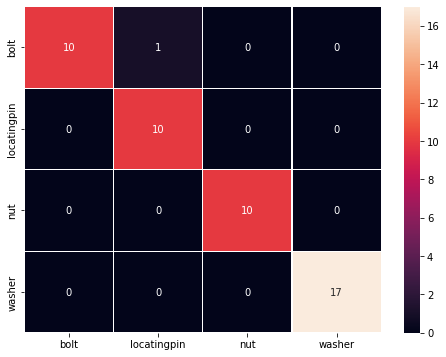


Classification Report:



,bolt,locatingpin,nut,washer,accuracy,macro avg,weighted avg
precision,1.000000,0.909091,1.0,1.0,0.979167,0.977273,0.981061
recall,0.909091,1.000000,1.0,1.0,0.979167,0.977273,0.979167
f1-score,0.952381,0.952381,1.0,1.0,0.979167,0.976190,0.979167
support,11.000000,10.000000,10.0,17.0,0.979167,48.000000,48.000000


In [32]:
#Result summary of test dataset
from numpy.ma.core import outer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import pandas as pd
print('accuracy_score:\n',accuracy_score(pred_list,label_list))
print('\nConfusion Matrix:\n')
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred_list,label_list),annot=True,linewidths=0.3,xticklabels=CLASS_NAMES,yticklabels=CLASS_NAMES)
plt.show()
print('\nClassification Report:\n')
pd.DataFrame(classification_report(pred_list,label_list,output_dict=True))